<a href="https://colab.research.google.com/github/RHZIF/Data-Science-Mini-Project/blob/main/Mini_Projet_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sujet de Mini-projet : Prediction des cours des actions cotée en bourse de Casablanca

Réalisé par:


*   Ahmed Ouaboune 
*   Yassine Rhzif 


## Dans la premiere partie de ce projet on a essayé de collecter les donneés qu'on va utiliser dans notre étude a partir de site web officiel. https://www.casablanca-bourse.com/
Pour cela on eu l'idée de créer un package qui va simplifier cette tache.
la documentation de package Casabourselib est disponible sur 
 https://github.com/RHZIF/CasaBourseLib/

In [ ]:
#instalation de package Casabourselib
pip install casabourselib

In [ ]:
#importation des packages 

###### Notre Package ########
import Casabourselib as cbl #
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas_datareader.data import DataReader
from datetime import datetime
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

#Dabord on va commencer par l'analyse des volumes de trading des 10 les plus grandes capitalisations boursieres dans la bourse de Casablanca:


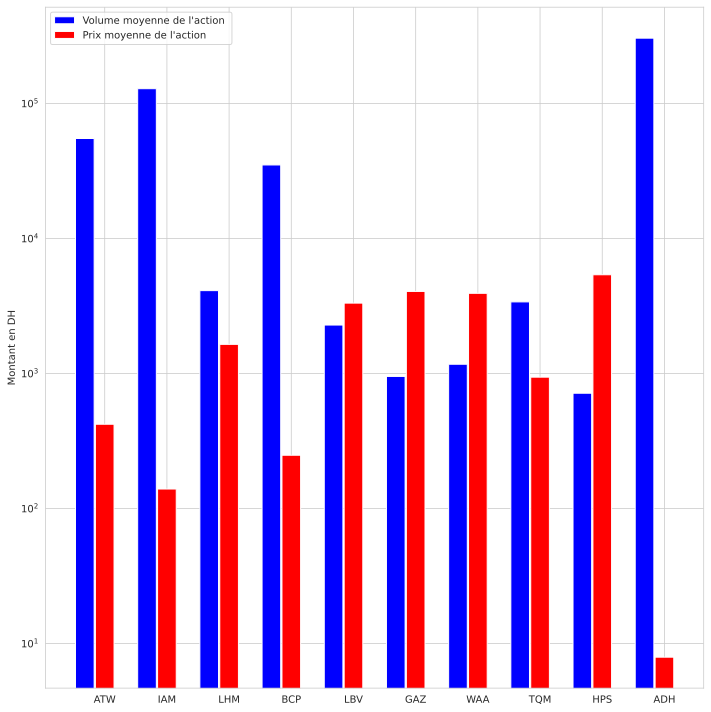

In [ ]:
# ATW = Attijari wafabanque
# IAM = Itissalat al maghrib 
# ...
#Ces symbols-la sont appelés 'des tickers' pour avoire une idée sur tous les tickers des entreprises cotée en bourse de Casablanca, merci d'executer cette commande  cbl.get_tickers()

top10 = ['ATW','IAM','LHM','BCP','LBV','GAZ','WAA','TQM','HPS', 'ADH']

average_volume = []
average_price = []
for ticker in top10:
  df = cbl.get_price(ticker,'01/01/2020','15/11/2021')
  temp1 = df.Volume.mean()
  temp2 = df.Close.mean()
  average_volume.append(temp1)
  average_price.append(temp2)

labels = top10

x = np.arange(len(labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(10,10))
plt.yscale('log')
fig.set_facecolor('white')

rects1 = ax.bar(x-0.32, average_volume, width=0.3, color='b', align='center', label=Volume moyenne de l'action ")
rects2 = ax.bar(x, average_price, width=0.3, color='r', align='center', label="Prix moyenne de l'action")

ax.set_ylabel('Montant en DH')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

# **On voit bien que les actions de Adohha, Attijari et Itissalat al maghrib ont les volume les plus importants dans le marché**

In [ ]:
company_name = [ "Attijari wafa banque", "addoha", "IAM"]

#utilisation de package Casabourselib pour faire le scraping des cours de ces 4 actions.
adh = cbl.get_price('ADH', '01/01/2006' ,'31/12/2021')
iam = cbl.get_price('IAM', '01/01/2006' ,'31/12/2021')
atw = cbl.get_price('ATW', '01/01/2006' ,'31/12/2021')
# cih = cbl.get_price('CIH', '01/01/2006' ,'31/12/2021')

company_list = [atw, adh, iam]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


Open    High    Low   Close  Volume Currency company_name
Date                                                                   
2021-12-20  139.70  139.85  139.0  139.00   28783      MAD          IAM
2021-12-21  138.50  138.95  137.8  137.80  199596      MAD          IAM
2021-12-22  137.65  137.95  137.0  137.60   97427      MAD          IAM
2021-12-23  137.50  137.95  137.0  137.40  276203      MAD          IAM
2021-12-24  137.40  137.90  137.1  137.15  225741      MAD          IAM
2021-12-27  137.15  137.70  137.0  137.20   22913      MAD          IAM
2021-12-28  137.20  137.55  137.2  137.40   22466      MAD          IAM
2021-12-29  137.50  139.25  137.4  139.25   43103      MAD          IAM
2021-12-30  139.25  139.35  138.9  139.25    8953      MAD          IAM
2021-12-31  139.25  139.45  138.1  139.45   77262      MAD          IAM

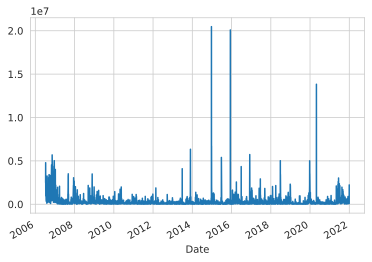

In [ ]:
#Visualisation de volume de Addoha 
adh.Volume.plot()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  adh[column_name] = adh['Close'].rolling(ma).mean()
  cih[column_name] = cih['Close'].rolling(ma).mean()
  atw[column_name] = atw['Close'].rolling(ma).mean()
  iam[column_name] = iam['Close'].rolling(ma).mean()


#Ici on va explorer les moyennes mobiles pour essayer de trouver des tendances  


Text(0.5, 1.0, 'ITISALAT ')

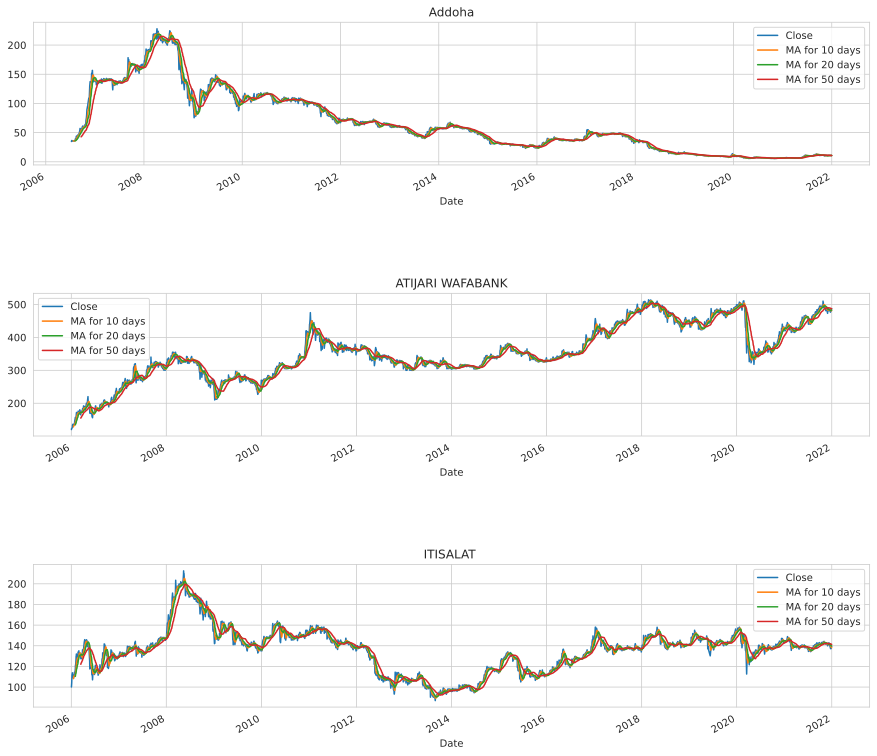

In [ ]:
# MA = Moving average / Moyenne mobile 

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(14)
fig.set_figwidth(15)

fig.subplots_adjust(hspace = .9)

adh[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('Addoha')

atw[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('ATIJARI WAFABANK')


iam[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2])
axes[2].set_title('ITISALAT ')

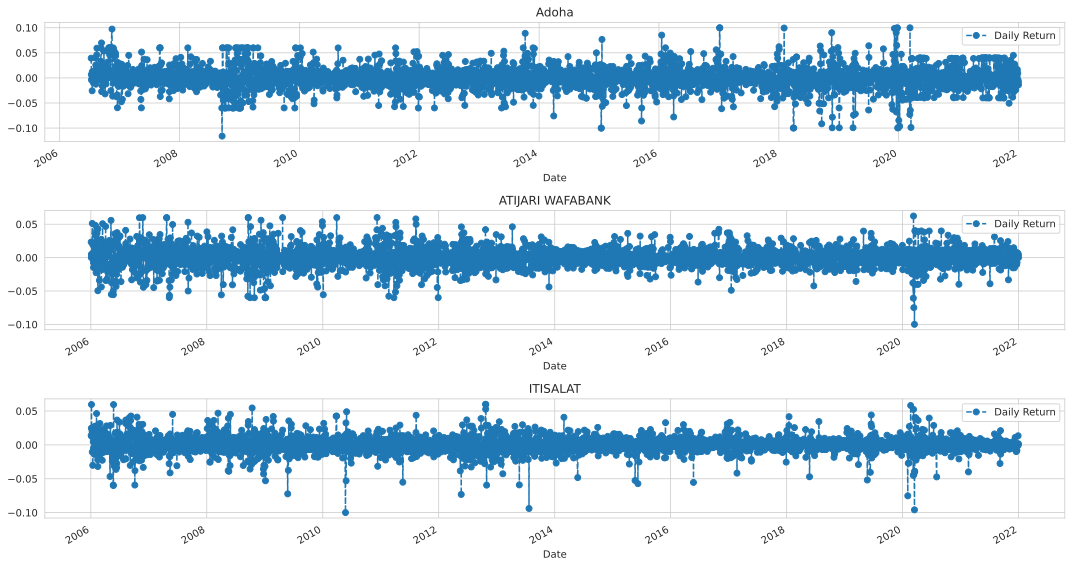

In [ ]:
#Ici on va comparer les rentabilités des 3 actions 

adh['Daily Return'] = adh['Close'].pct_change()
atw['Daily Return'] = atw['Close'].pct_change()
iam['Daily Return'] = iam['Close'].pct_change()

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

adh['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('Adoha')


atw['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('ATIJARI WAFABANK')

iam['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('ITISALAT')

fig.tight_layout()




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

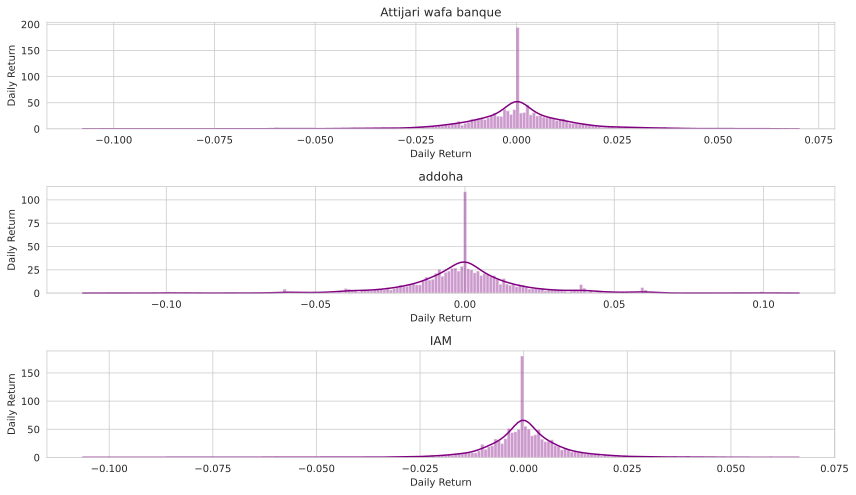

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    sns.distplot(company['Daily Return'].dropna(), bins=200, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
adh.rename(columns = {'Close':'adh'}, inplace = True)
atw.rename(columns = {'Close':'atw'}, inplace = True)
iam.rename(columns = {'Close':'iam'}, inplace = True)
df_rent = pd.concat([adh.adh,atw.atw,iam.iam], axis=1)


In [ ]:
df_rent = df_rent.pct_change()

In [ ]:
sns.pairplot(df_rent, kind='reg')

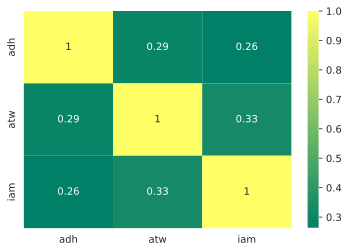

In [ ]:
#Analyse de correlation entre les 3 actions:
df_rent.corr(method='pearson')
sns.heatmap(df_rent.corr(), annot=True, cmap='summer')

# Partie Modelisation ▶

Visualisation de cours d'Addoha:

[]

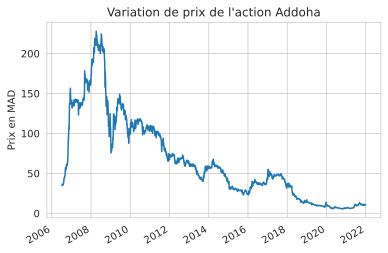

In [ ]:
adh.adh.plot()
plt.ylabel('Prix en MAD')
plt.xlabel(None)
plt.title(f"Variation de prix de l'action Addoha")
    
plt.plot()

In [ ]:
#filtrer le dataframe de maniere a prendre juste les valeurs de prix de l'action Addoha
data = adh.filter(['adh'])
# Convertir le dataframe en un tableau numpy
dataset = data.values
#Obtenez le nombre de lignes sur lesquelles le modèle doit être entraîné.
training_data_len = int(np.ceil( len(dataset) * .75 ))

Analyse de la correlation : 

Matrice de correlation 


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

values = pd.DataFrame(dataset)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dtf = dataframe.dropna()
result = dtf.corr()
print(result)


          t-1       t+1
t-1  1.000000  0.997239
t+1  0.997239  1.000000


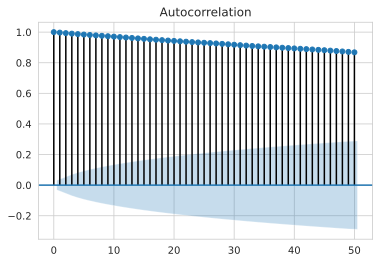

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, alpha =0.05, lags=50)
pyplot.show()

Conclusion : Une forte correlation entre nos donnees, par consequences toutes les observations sont dependents ce qui va faciliter la modélisation 


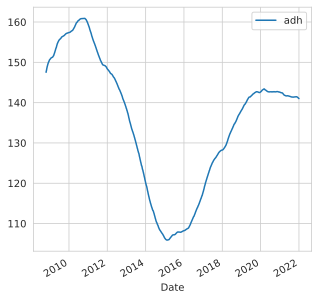

In [ ]:
#detecter la tendance de nos data en terme de stationnarité
mes=data.rolling(window=700).mean()
mes.plot(figsize=(5,5))

In [ ]:
mes_ba=pd.concat([data,data.shift(1)],axis=1)
mes_ba.columns=['re_val','forcast_val']
mes_ba.dropna()


re_val  forcast_val
Date                           
2006-01-03  101.50       100.10
2006-01-04  104.00       101.50
2006-01-05  110.20       104.00
2006-01-06  111.60       110.20
2006-01-09  113.80       111.60
...            ...          ...
2021-12-27  137.20       137.15
2021-12-28  137.40       137.20
2021-12-29  139.25       137.40
2021-12-30  139.25       139.25
2021-12-31  139.45       139.25

[3971 rows x 2 columns]

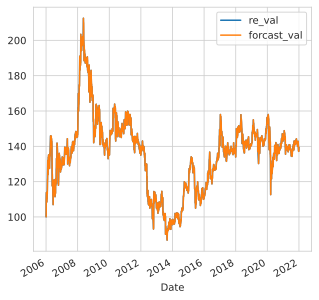

In [ ]:
mes_ba.plot(figsize=(5,5))

In [ ]:
#calcule l'erreur de notre modele ARIMA 
from sklearn.metrics import mean_squared_error
new=mes_ba.dropna()
mes_err = mean_squared_error(new.re_val,new.forcast_val)
print("MSE =", mes_err)


MSE = 2.3715225635859984


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
train_data = data[0:100]
test_data = data[100:200]
#Le choix de parametres du modeles arima a été baser principalement sur l'autocorrélation partielle
new_model = ARIMA(train_data,order=(3,1,2))
new_model_fit=new_model.fit()
#new_model_fit.aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


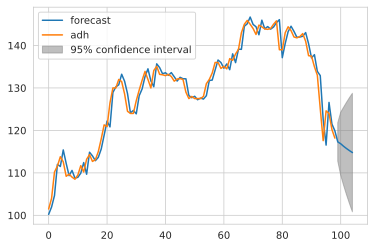

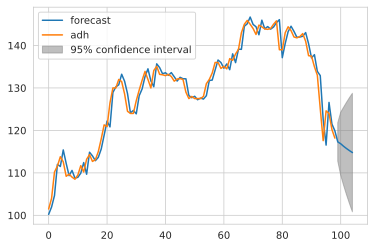

In [ ]:
new_model_fit.plot_predict(1,105)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#la normalisation de donnes par la methode de min_max
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[0:4,0]

array([0.10502429, 0.11617167, 0.13607771, 0.1854447 ])

In [ ]:
#Créer l'ensemble de données et la normaliser
y = dataset[0:int(training_data_len)]
scaler = MinMaxScaler(feature_range=(0,1))
train_data = (y-y.mean())/y.std()   #scaler.fit_transform(y) ##

#Divisez les données en deux ensembles de données : x_train et y_train.
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()

#Convertir le x_train et le y_train en tableaux numpy 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reformuler la data pour qu'il soit compatible avec notre modele
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape"""
#(x_train.shape[1],1)

(x_train.shape[0], x_train.shape[1], 1)
x_train.shape[1]

[array([-1.43709067, -1.37694139, -1.26953196, -1.00315659, -0.94300731,
       -0.84848701, -0.90004354, -1.04612036, -1.02463847, -1.05471311,
       -1.076195  , -1.03323123, -0.93871093, -1.00315659, -0.87426528,
       -0.82700513, -0.89574716, -0.87856165, -0.79693049, -0.66803918,
       -0.52625874, -0.54344425, -0.30284713, -0.15247394, -0.15247394,
       -0.06654639, -0.08802828, -0.21262321, -0.38877467, -0.41025656,
       -0.41025656, -0.28136525, -0.17395582, -0.07513915,  0.01508477,
       -0.06654639, -0.15247394,  0.02367752,  0.06664129, -0.01498987,
       -0.01928625, -0.027879  , -0.01498987, -0.03647176, -0.0837319 ,
       -0.06225002, -0.05795364, -0.06654639, -0.19543771, -0.25988336,
       -0.23840148, -0.25988336, -0.25988336, -0.25988336, -0.23840148,
       -0.10951017, -0.06654639, -0.00210074,  0.10530869,  0.10530869])]
[0.04515940788346808]

[array([-1.43709067, -1.37694139, -1.26953196, -1.00315659, -0.94300731,
       -0.84848701, -0.90004354, -1.0

60

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Construire le modèle LSTM (les couches et les neurones)
model = Sequential()
model.add(LSTM(250, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#Former le modèle
history = model.fit(x_train, y_train, batch_size=100, epochs=8)

Epoch 1/8
30/30 [==============================] - 17s 433ms/step - loss: 0.1080 - accuracy: 0.0000e+00
Epoch 2/8
30/30 [==============================] - 13s 448ms/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 3/8
30/30 [==============================] - 13s 432ms/step - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 4/8
30/30 [==============================] - 13s 424ms/step - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 5/8
30/30 [==============================] - 13s 426ms/step - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6/8
30/30 [==============================] - 13s 422ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 7/8
30/30 [==============================] - 13s 426ms/step - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 8/8
30/30 [==============================] - 13s 426ms/step - loss: 0.0122 - accuracy: 0.0000e+00


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 250)           252000    
                                                                 
 lstm_1 (LSTM)               (None, 50)                60200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 313,501
Trainable params: 313,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Créer l'ensemble de données de test
# Créez un nouveau tableau contenant les valeurs normaliser

x = dataset[training_data_len - 60: , :]
#test_data = scaled_data[training_data_len - 60: , :]
scaler = MinMaxScaler(feature_range=(0,1))
test_data = scaler.fit_transform(x)

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convertir les données en un tableau numpy
x_test = np.array(x_test)

#Reformuler la data pour qu'il soit compatible avec notre modele
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#calcule l'erreur de notre modele d'arima 
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.713909217283963

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


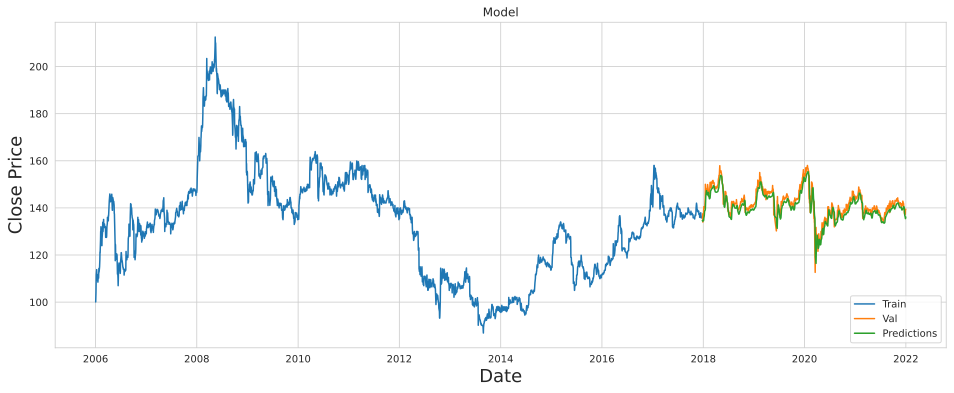

In [ ]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['adh'])
plt.plot(valid[['adh', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

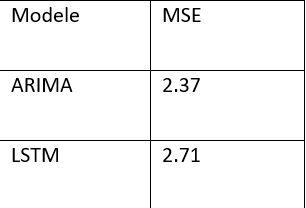